In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
df = pd.read_csv("/content/gdrive/MyDrive/full_data_flightdelay.csv")

Mounted at /content/gdrive


In [ ]:
df_airline = df[['CARRIER_NAME','DEP_DEL15']]

In [ ]:
df_airline

,CARRIER_NAME,DEP_DEL15
0,Southwest Airlines Co.,0
1,Delta Air Lines Inc.,0
2,Delta Air Lines Inc.,0
3,Delta Air Lines Inc.,0
4,Spirit Air Lines,0
...,...,...
6489057,Hawaiian Airlines Inc.,0
6489058,Hawaiian Airlines Inc.,0
6489059,Hawaiian Airlines Inc.,0
6489060,Hawaiian Airlines Inc.,0


In [ ]:
df_airline = df.groupby(['CARRIER_NAME'])['DEP_DEL15'].count().to_frame(name='count').reset_index()

In [ ]:
df_del = df[df['DEP_DEL15']==1]

In [ ]:
df_del

,Unnamed: 0,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
7,7,1,7,1,0001-0559,7,1,10,186,Frontier Airlines Inc.,...,3,McCarran International,36.080,-115.152,NONE,0.00,0.0,0.0,65.0,2.91
10,10,1,7,1,2300-2359,6,1,17,180,Frontier Airlines Inc.,...,3,McCarran International,36.080,-115.152,NONE,0.00,0.0,0.0,65.0,2.91
15,15,1,7,1,0700-0759,4,1,29,181,Alaska Airlines Inc.,...,4,McCarran International,36.080,-115.152,NONE,0.00,0.0,0.0,65.0,2.91
24,24,1,7,1,1000-1059,3,1,29,142,United Air Lines Inc.,...,19,McCarran International,36.080,-115.152,NONE,0.00,0.0,0.0,65.0,2.91
36,36,1,7,1,2200-2259,9,1,9,162,JetBlue Airways,...,15,McCarran International,36.080,-115.152,NONE,0.00,0.0,0.0,65.0,2.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488963,6488963,12,7,1,1300-1359,10,2,8,181,American Airlines Inc.,...,5,Kahului Airport,20.901,-156.434,Los Angeles International,0.00,0.0,0.0,84.0,10.29
6488965,6488965,12,7,1,1400-1459,10,2,7,189,Hawaiian Airlines Inc.,...,1,Kahului Airport,20.901,-156.434,Portland International,0.00,0.0,0.0,84.0,10.29
6488994,6488994,12,7,1,1700-1759,1,4,4,123,Hawaiian Airlines Inc.,...,18,Kahului Airport,20.901,-156.434,Honolulu International,0.00,0.0,0.0,84.0,10.29
6489014,6489014,12,7,1,1500-1559,1,9,8,123,Hawaiian Airlines Inc.,...,18,Kahului Airport,20.901,-156.434,Keahole,0.00,0.0,0.0,84.0,10.29


In [ ]:
df_delcount = df_del.groupby(['CARRIER_NAME'])['DEP_DEL15'].count().to_frame(name='delayedcount').reset_index()

In [ ]:
df_airline

,CARRIER_NAME,count
0,Alaska Airlines Inc.,239337
1,Allegiant Air,42636
2,American Airlines Inc.,903640
3,American Eagle Airlines Inc.,228792
4,Atlantic Southeast Airlines,99044
5,Comair Inc.,219324
6,Delta Air Lines Inc.,938346
7,Endeavor Air Inc.,203827
8,Frontier Airlines Inc.,120872
9,Hawaiian Airlines Inc.,74898


In [ ]:
df_delcount

,CARRIER_NAME,delayedcount
0,Alaska Airlines Inc.,39417
1,Allegiant Air,8072
2,American Airlines Inc.,181350
3,American Eagle Airlines Inc.,41153
4,Atlantic Southeast Airlines,23004
5,Comair Inc.,42687
6,Delta Air Lines Inc.,137361
7,Endeavor Air Inc.,35641
8,Frontier Airlines Inc.,31536
9,Hawaiian Airlines Inc.,6521


In [ ]:
df_merge = pd.merge(df_airline,df_delcount,on='CARRIER_NAME')

In [ ]:
df_merge

,CARRIER_NAME,count,delayedcount
0,Alaska Airlines Inc.,239337,39417
1,Allegiant Air,42636,8072
2,American Airlines Inc.,903640,181350
3,American Eagle Airlines Inc.,228792,41153
4,Atlantic Southeast Airlines,99044,23004
5,Comair Inc.,219324,42687
6,Delta Air Lines Inc.,938346,137361
7,Endeavor Air Inc.,203827,35641
8,Frontier Airlines Inc.,120872,31536
9,Hawaiian Airlines Inc.,74898,6521


In [ ]:
import numpy as np
df_merge['perc'] = np.round(df_merge['delayedcount']/df_merge['count']*100,1)

In [ ]:
df_merge

,CARRIER_NAME,count,delayedcount,perc
0,Alaska Airlines Inc.,239337,39417,16.5
1,Allegiant Air,42636,8072,18.9
2,American Airlines Inc.,903640,181350,20.1
3,American Eagle Airlines Inc.,228792,41153,18.0
4,Atlantic Southeast Airlines,99044,23004,23.2
5,Comair Inc.,219324,42687,19.5
6,Delta Air Lines Inc.,938346,137361,14.6
7,Endeavor Air Inc.,203827,35641,17.5
8,Frontier Airlines Inc.,120872,31536,26.1
9,Hawaiian Airlines Inc.,74898,6521,8.7


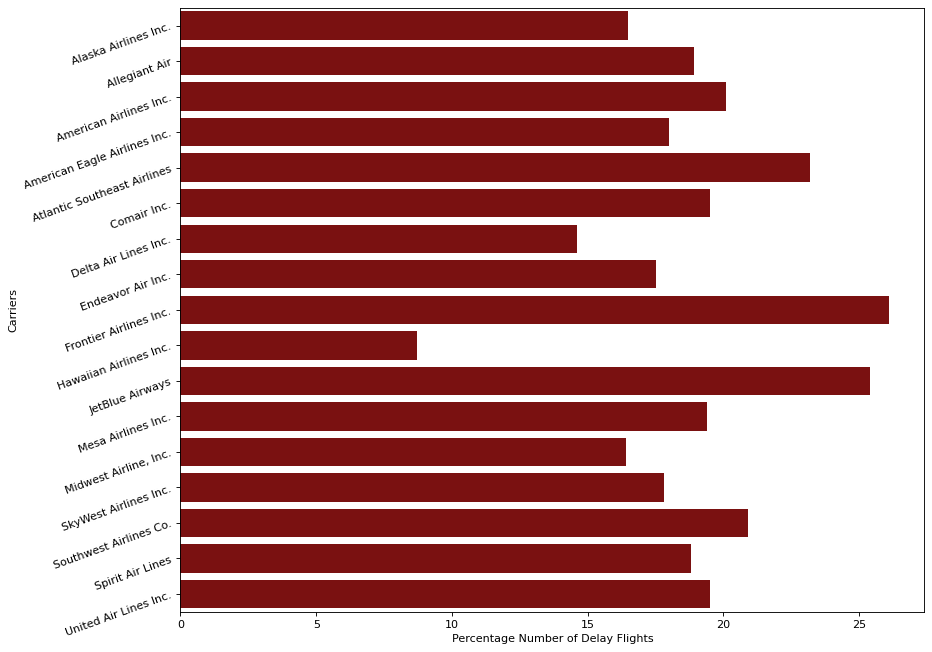

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# f,ax = plt.subplots(1,2,figsize=(20,15))
from matplotlib.pyplot import figure
figure(figsize=(12,10),dpi=80)
# sns.barplot('Abbr','count',data=df_plt,order=list(abbr.values())).set_title('Total Delays by Carrier')
#ax = sns.barplot('CARRIER_NAME','perc',data=df_merge,order=df_merge['CARRIER_NAME']).set_title('Total Delays by Carrier')
ax = sns.barplot(y = 'CARRIER_NAME', x = 'perc', 
              data = df_merge,color = 'DarkRed',orient = 'h')
ax.set(ylabel='Carriers',xlabel='Percentage Number of Delay Flights')
plt.yticks(rotation=20)

plt.close(2)
plt.show()

In [ ]:
df.columns

Index(['Unnamed: 0', 'MONTH', 'DAY_OF_WEEK', 'DEP_DEL15', 'DEP_TIME_BLK',
       'DISTANCE_GROUP', 'SEGMENT_NUMBER', 'CONCURRENT_FLIGHTS',
       'NUMBER_OF_SEATS', 'CARRIER_NAME', 'AIRPORT_FLIGHTS_MONTH',
       'AIRLINE_FLIGHTS_MONTH', 'AIRLINE_AIRPORT_FLIGHTS_MONTH',
       'AVG_MONTHLY_PASS_AIRPORT', 'AVG_MONTHLY_PASS_AIRLINE',
       'FLT_ATTENDANTS_PER_PASS', 'GROUND_SERV_PER_PASS', 'PLANE_AGE',
       'DEPARTING_AIRPORT', 'LATITUDE', 'LONGITUDE', 'PREVIOUS_AIRPORT',
       'PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND'],
      dtype='object')

In [ ]:
df.DAY_OF_WEEK.value_counts()

5    969141
1    967364
4    955682
2    946470
3    938328
7    922159
6    789918
Name: DAY_OF_WEEK, dtype: int64

In [ ]:
df_airline = df.groupby(['CARRIER_NAME'])['DEP_DEL15'].count().to_frame(name='count').reset_index()

In [ ]:
df_weekall = df.groupby(['DAY_OF_WEEK'])['DEP_DEL15'].count().to_frame(name='count').reset_index()

In [ ]:
df_weekall

,DAY_OF_WEEK,count
0,1,967364
1,2,946470
2,3,938328
3,4,955682
4,5,969141
5,6,789918
6,7,922159


In [ ]:
def convertnumtoname(dayofweek):
  dict = {1:'Sun',2:'Mon',3:'Tue',4:'Wed',5:'Thu',6:'Fri',7:'Sat'}
  return dict[dayofweek]
df_weekall['DAY_OF_WEEK_TXT'] = df_weekall['DAY_OF_WEEK'].apply(convertnumtoname)

In [ ]:
df_weekall

,DAY_OF_WEEK,count,DAY_OF_WEEK_TXT
0,1,967364,Sun
1,2,946470,Mon
2,3,938328,Tue
3,4,955682,Wed
4,5,969141,Thu
5,6,789918,Fri
6,7,922159,Sat


In [ ]:
df_del_week = df_del.groupby(['DAY_OF_WEEK'])['DEP_DEL15'].count().to_frame(name='delayedweek').reset_index()

In [ ]:
df_del_week

,DAY_OF_WEEK,delayedweek
0,1,191406
1,2,165087
2,3,169243
3,4,196768
4,5,193772
5,6,133468
6,7,177624


In [ ]:
df_week_plot = pd.merge(df_weekall,df_del_week,on='DAY_OF_WEEK')

In [ ]:
df_week_plot['percdelay'] = np.round(df_week_plot['delayedweek']/df_week_plot['count']*100,2)

In [ ]:
df_week_plot

,DAY_OF_WEEK,count,DAY_OF_WEEK_TXT,delayedweek,percdelay
0,1,967364,Sun,191406,19.79
1,2,946470,Mon,165087,17.44
2,3,938328,Tue,169243,18.04
3,4,955682,Wed,196768,20.59
4,5,969141,Thu,193772,19.99
5,6,789918,Fri,133468,16.90
6,7,922159,Sat,177624,19.26


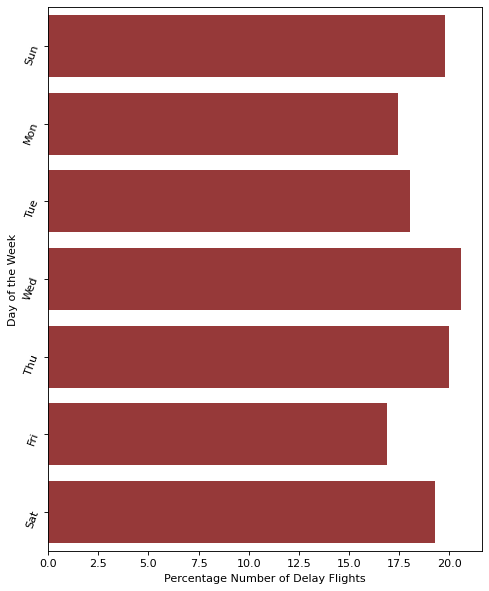

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# f,ax = plt.subplots(1,2,figsize=(20,15))
from matplotlib.pyplot import figure
figure(figsize=(7,9),dpi=80)
sns.set_color_codes("muted")

# sns.barplot('Abbr','count',data=df_plt,order=list(abbr.values())).set_title('Total Delays by Carrier')
#ax = sns.barplot('CARRIER_NAME','perc',data=df_merge,order=df_merge['CARRIER_NAME']).set_title('Total Delays by Carrier')
ax = sns.barplot(y = 'DAY_OF_WEEK_TXT', x = 'percdelay', 
              data = df_week_plot,color = 'Brown',orient = 'h')
ax.set(ylabel='Day of the Week',xlabel='Percentage Number of Delay Flights')
plt.yticks(rotation=70)

plt.close(2)
plt.show()

In [ ]:
df.MONTH.value_counts()

8     579532
7     578193
10    561327
5     558025
6     557027
3     554120
12    551896
4     533687
11    531893
9     529873
1     502050
2     451439
Name: MONTH, dtype: int64

In [ ]:
def monthtxt(monthnum):
  dict = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
  return dict[monthnum]


In [ ]:
df_monthall = df.groupby('MONTH')['DEP_DEL15'].count().to_frame(name='TotalMonth').reset_index()

In [ ]:
df_monthdel = df_del.groupby('MONTH')['DEP_DEL15'].count().to_frame(name='DelayedMonth').reset_index()

In [ ]:
df_plot_month = pd.merge(df_monthall,df_monthdel,on='MONTH')

In [ ]:
df_plot_month['perc'] = np.round(df_plot_month['DelayedMonth']/df_plot_month['TotalMonth']*100,1)

In [ ]:
df_plot_month['MONTHTXT'] = df_plot_month['MONTH'].apply(monthtxt)

In [ ]:
df_plot_month

,MONTH,TotalMonth,DelayedMonth,perc,MONTHTXT
0,1,502050,87682,17.5,Jan
1,2,451439,98036,21.7,Feb
2,3,554120,96589,17.4,Mar
3,4,533687,98757,18.5,Apr
4,5,558025,113530,20.3,May
5,6,557027,135871,24.4,Jun
6,7,578193,123238,21.3,Jul
7,8,579532,119411,20.6,Aug
8,9,529873,72834,13.7,Sep
9,10,561327,90745,16.2,Oct


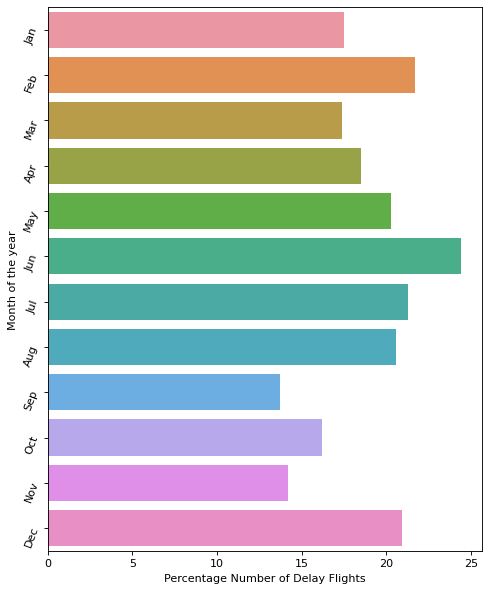

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# f,ax = plt.subplots(1,2,figsize=(20,15))
from matplotlib.pyplot import figure
figure(figsize=(7,9),dpi=80)
sns.set_color_codes("pastel")

# sns.barplot('Abbr','count',data=df_plt,order=list(abbr.values())).set_title('Total Delays by Carrier')
#ax = sns.barplot('CARRIER_NAME','perc',data=df_merge,order=df_merge['CARRIER_NAME']).set_title('Total Delays by Carrier')
ax = sns.barplot(y = 'MONTHTXT', x = 'perc', 
              data = df_plot_month,orient = 'h')
ax.set(ylabel='Month of the year',xlabel='Percentage Number of Delay Flights')
plt.yticks(rotation=70)

plt.close(2)
plt.show()

In [ ]:
# Relation between the origin airport and delays

In [ ]:
import matplotlib.pyplot as plt
df_merge

,CARRIER_NAME,count,delayedcount,perc
0,Alaska Airlines Inc.,239337,39417,16.5
1,Allegiant Air,42636,8072,18.9
2,American Airlines Inc.,903640,181350,20.1
3,American Eagle Airlines Inc.,228792,41153,18.0
4,Atlantic Southeast Airlines,99044,23004,23.2
5,Comair Inc.,219324,42687,19.5
6,Delta Air Lines Inc.,938346,137361,14.6
7,Endeavor Air Inc.,203827,35641,17.5
8,Frontier Airlines Inc.,120872,31536,26.1
9,Hawaiian Airlines Inc.,74898,6521,8.7


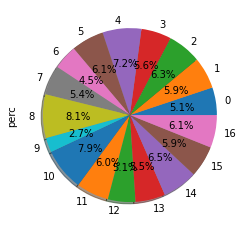

In [ ]:
df_merge['perc'].plot.pie(autopct='%1.1f%%',shadow=True)

<Figure size 2320x2320 with 0 Axes>

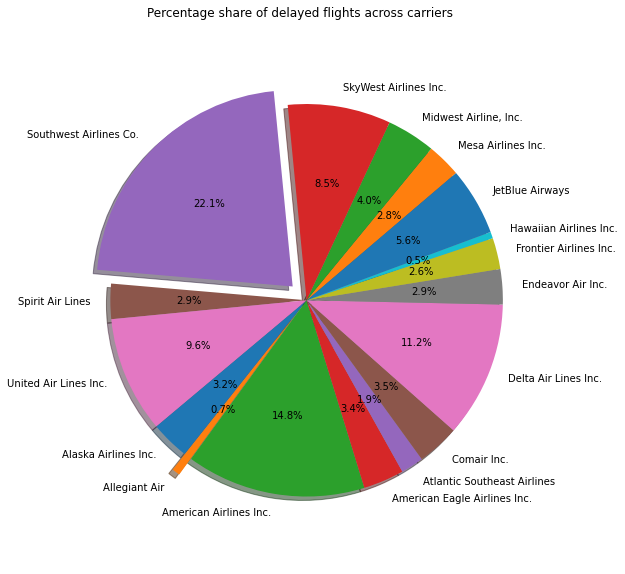

In [ ]:
figure(figsize=(29,29),dpi=80)
labels = df_merge['CARRIER_NAME']
sizes = df_merge['delayedcount']
explode = (0, 0.1, 0, 0,0,0,0,0,0,0,0,0,0,0,0.1,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(8,10))
plt.title('Percentage share of delayed flights across carriers')
ax1.pie(sizes, explode=explode, labels=labels, autopct='%0.1f%%',
        shadow=True, startangle=-140)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Section for plotting the airport wise delays on a map

In [ ]:
import plotly.express as px

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6489062 entries, 0 to 6489061
Data columns (total 27 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   Unnamed: 0                     int64  
 1   MONTH                          int64  
 2   DAY_OF_WEEK                    int64  
 3   DEP_DEL15                      int64  
 4   DEP_TIME_BLK                   object 
 5   DISTANCE_GROUP                 int64  
 6   SEGMENT_NUMBER                 int64  
 7   CONCURRENT_FLIGHTS             int64  
 8   NUMBER_OF_SEATS                int64  
 9   CARRIER_NAME                   object 
 10  AIRPORT_FLIGHTS_MONTH          int64  
 11  AIRLINE_FLIGHTS_MONTH          int64  
 12  AIRLINE_AIRPORT_FLIGHTS_MONTH  int64  
 13  AVG_MONTHLY_PASS_AIRPORT       int64  
 14  AVG_MONTHLY_PASS_AIRLINE       int64  
 15  FLT_ATTENDANTS_PER_PASS        float64
 16  GROUND_SERV_PER_PASS           float64
 17  PLANE_AGE                      int64  
 18  DE

In [ ]:
df_airports = df[['LATITUDE','LONGITUDE','DEP_DEL15','DEPARTING_AIRPORT','AIRPORT_FLIGHTS_MONTH']]


In [ ]:
df_airports['LATLNG'] = df['LATITUDE'].astype(str) + " " + df['LONGITUDE'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_airports.head()

,LATITUDE,LONGITUDE,DEP_DEL15,DEPARTING_AIRPORT,AIRPORT_FLIGHTS_MONTH,LATLNG
0,36.08,-115.152,0,McCarran International,13056,36.08 -115.152
1,36.08,-115.152,0,McCarran International,13056,36.08 -115.152
2,36.08,-115.152,0,McCarran International,13056,36.08 -115.152
3,36.08,-115.152,0,McCarran International,13056,36.08 -115.152
4,36.08,-115.152,0,McCarran International,13056,36.08 -115.152


In [ ]:
df_airports_grouped = df_airports.groupby(['LATITUDE','LONGITUDE','DEPARTING_AIRPORT'],as_index=False).agg({'DEP_DEL15':'sum','AIRPORT_FLIGHTS_MONTH':'sum'})

In [ ]:
df_airports_grouped.head()
df_airports_grouped['ratio'] = (df_airports_grouped['DEP_DEL15']/df_airports_grouped['AIRPORT_FLIGHTS_MONTH'])*100

In [ ]:
fig = px.scatter_geo(df_airports_grouped, lat=df_airports_grouped['LATITUDE'], lon = df_airports_grouped['LONGITUDE'], color="DEPARTING_AIRPORT",
                     hover_name="DEPARTING_AIRPORT", size="ratio",
                     projection="albers usa",scope='usa')
fig.show()

In [ ]:
df['DEPARTING_AIRPORT'].value_counts()

Atlanta Municipal                 392603
Chicago O'Hare International      329045
Dallas Fort Worth Regional        296449
Stapleton International           247175
Douglas Municipal                 231855
                                   ...  
Portland International Jetport      3609
Pensacola Regional                  3578
Spokane International               3421
Sanford NAS                         2293
Puerto Rico International             84
Name: DEPARTING_AIRPORT, Length: 96, dtype: int64